In [3]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

# ワーニングを表示させない
import warnings
warnings.filterwarnings('ignore')

## データの読み込み

In [4]:
# データを読み込む
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html
# https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv
data = pd.read_csv('../datasets/AirPassengers.csv',
                    index_col='Month',
                    parse_dates=True,
                    dtype='float')
data.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [5]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

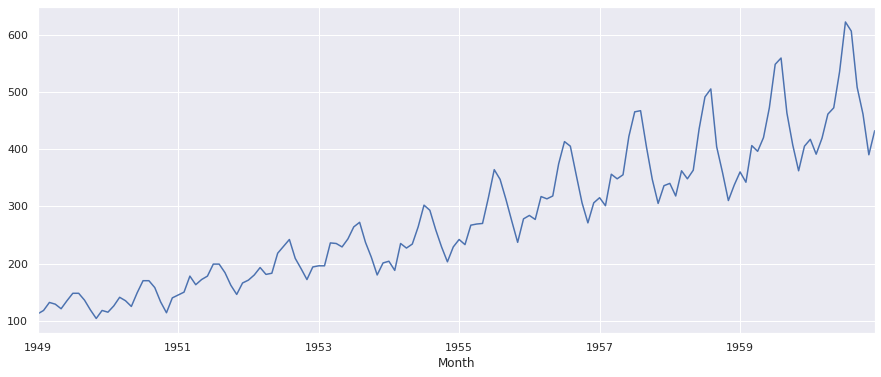

In [6]:
ts.plot()

<AxesSubplot:xlabel='Month'>

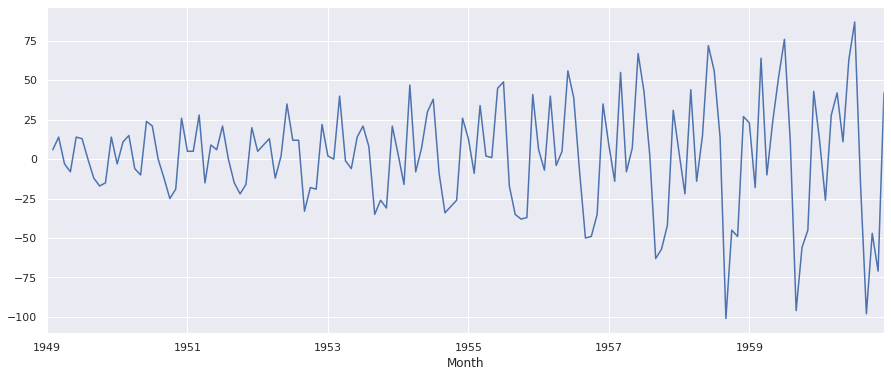

In [7]:
# 差分系列
ts.diff().plot()

<AxesSubplot:xlabel='Month'>

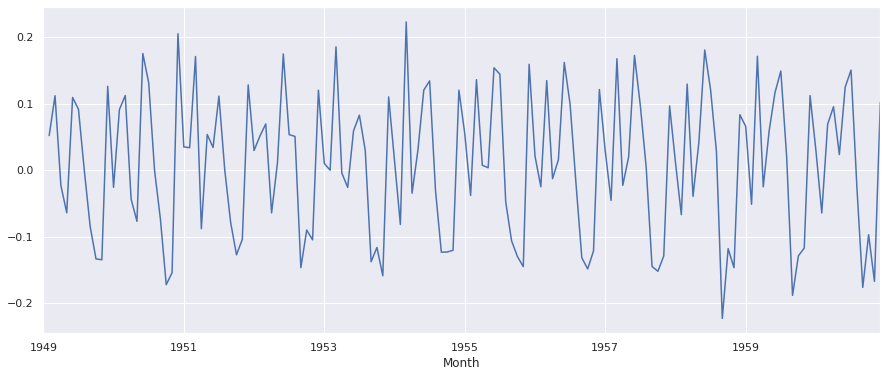

In [8]:
# 対数差分
logDiff = np.log(ts) - np.log(ts.shift())
logDiff.plot()

## 自己相関係数

In [9]:
# 自己相関
ts_acf = sm.tsa.stattools.acf(ts, nlags=50)
ts_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092, 0.13840041, 0.11140324, 0.09098453, 0.08217177,
       0.08877222, 0.10386958, 0.12393082, 0.13263456, 0.10374723,
       0.06209805])

In [10]:
# 偏自己相関
ts_pacf = sm.tsa.stattools.pacf(ts, nlags=50, method='ols')
ts_pacf

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003, -0.07391131,  0.22775972,  0.30783864, -0.04934392,
        0.2258161 ,  0.31873552, -0.02808757,  0.24590141, -0.23228483,
        0.05688533])

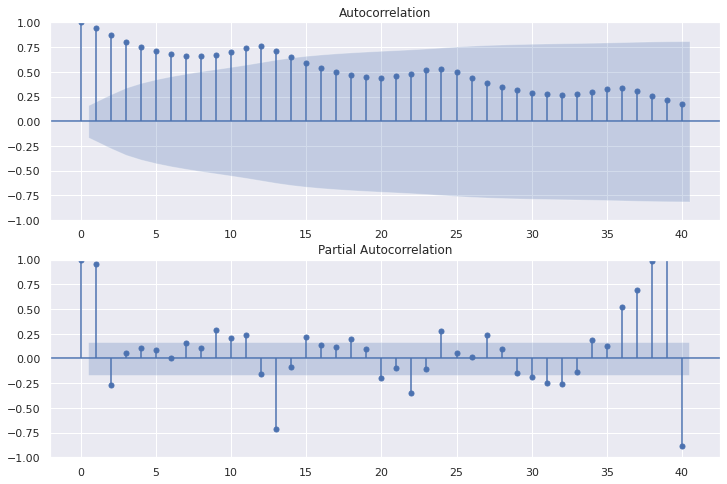

In [11]:
# 自己相関のグラフ
fig, axes = plt.subplots(2,1, figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(ts, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(ts, lags=40, ax=axes[1])



## 時系列データの分解

<Figure size 864x1152 with 0 Axes>

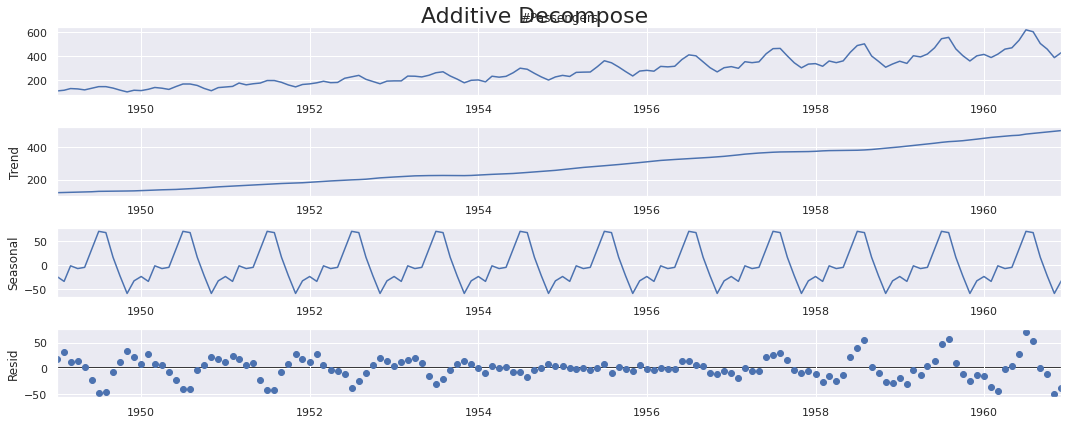

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(ts, model='additive', extrapolate_trend='freq')

# Plot
fig = plt.figure(figsize=(12,16))
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


## 非定常の検定

In [27]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(ts, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(ts, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598

KPSS Statistic: 1.651312
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


## ホワイトノイズ

<AxesSubplot:>

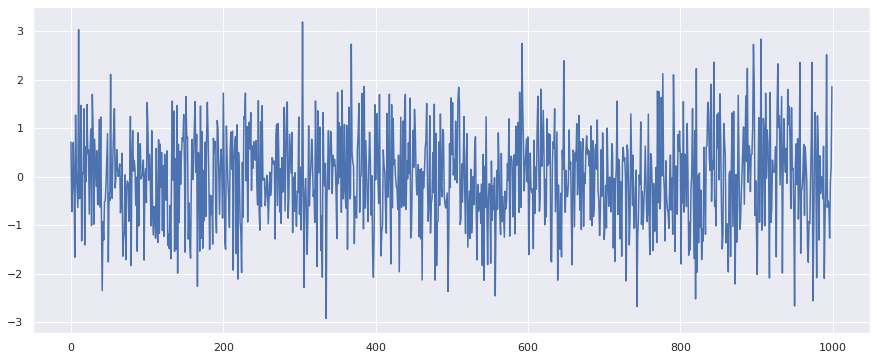

In [28]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot()


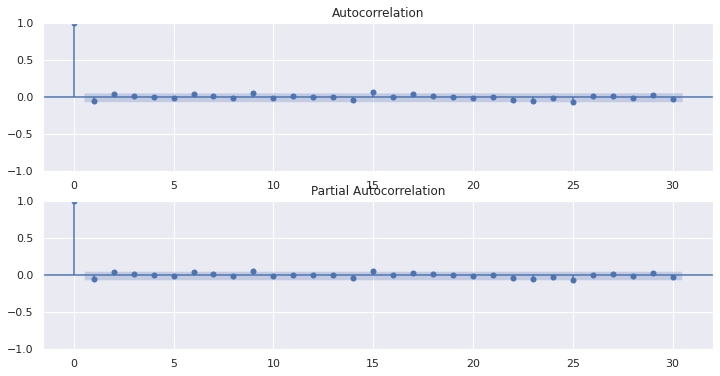

In [31]:
fig, axes = plt.subplots(2,1,figsize=(12,6))
fig = sm.graphics.tsa.plot_acf(randvals, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(randvals, ax=axes[1])

## トレンドを分離

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

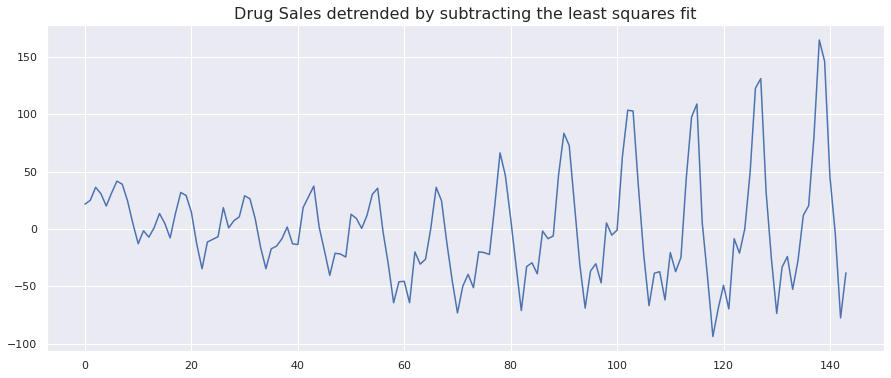

In [32]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(ts)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)


Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

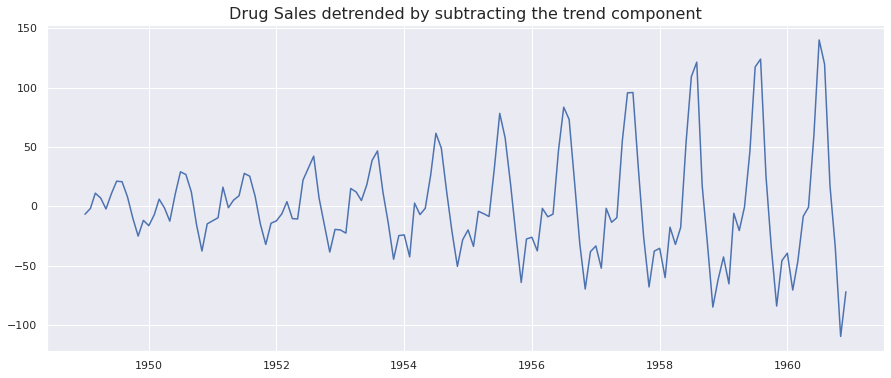

In [33]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(ts, model='multiplicative', extrapolate_trend='freq')
detrended = ts - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)


## 季節成分を分離

[]

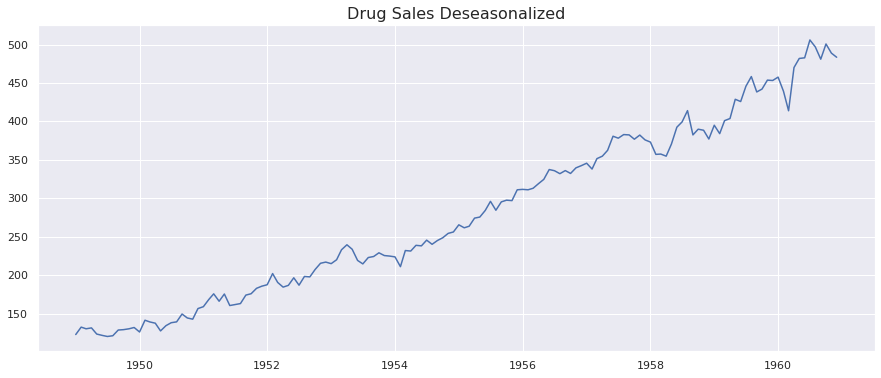

In [35]:
# Time Series Decomposition
result_mul = seasonal_decompose(ts, model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = ts / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

## ARIMAモデル

In [12]:
diff = ts.diff()
diff = diff.dropna()
diff.head()

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: #Passengers, dtype: float64

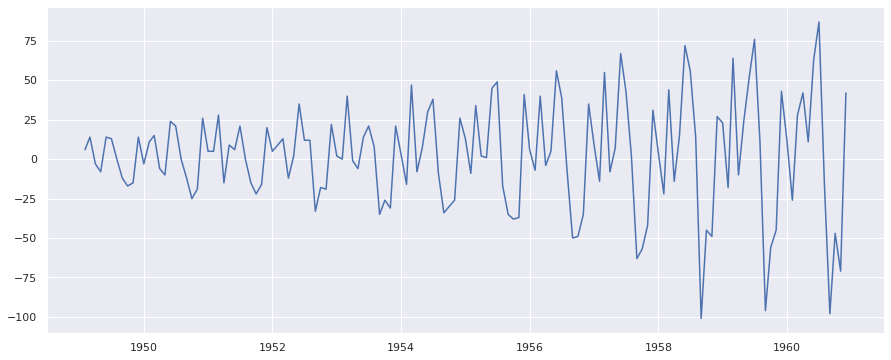

In [13]:
plt.plot(diff)

In [14]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='c')
resDiff

{'aic':              0            1            2
 0  1415.277587  1398.827110  1398.385532
 1  1403.473489  1396.121579  1371.815393
 2  1397.975152  1361.695814  1344.043676
 3  1396.151049  1362.451012  1360.749618
 4  1388.509998  1384.811553  1356.163967,
 'aic_min_order': (2, 2)}

In [15]:
# p=2, q=2が最善となったのでモデル化する
from statsmodels.tsa.arima.model import ARIMA
ARIMA_2_1_2 = ARIMA(ts, order=(2,1,2)).fit()
ARIMA_2_1_2.params

ar.L1       1.685024
ar.L2      -0.954852
ma.L1      -1.843205
ma.L2       0.995265
sigma2    665.964602
dtype: float64

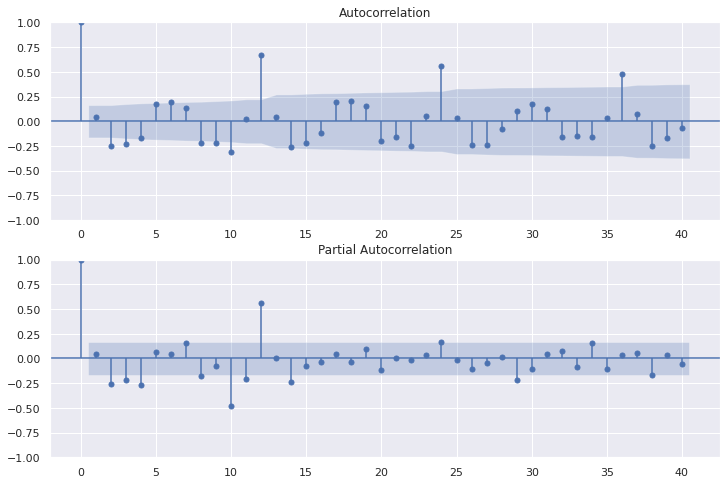

In [16]:
# 残差チェック
# 季節の周期性が残っている
resid = ARIMA_2_1_2.resid
fig, axes = plt.subplots(2,1, figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=axes[1])


## SARIMAモデル

In [17]:
SARIMA_2_1_2_111 = sm.tsa.SARIMAX(ts, order=(2,1,2), seasonal_order=(1,1,1,12)).fit(method='bfgs', maxiter=300)
print(SARIMA_2_1_2_111.summary())

         Current function value: 3.511127
         Iterations: 8
         Function evaluations: 46
         Gradient evaluations: 35
                                      SARIMAX Results                                       
Dep. Variable:                          #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -505.602
Date:                              Thu, 25 Nov 2021   AIC                           1025.205
Time:                                      00:28:28   BIC                           1045.331
Sample:                                  01-01-1949   HQIC                          1033.383
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

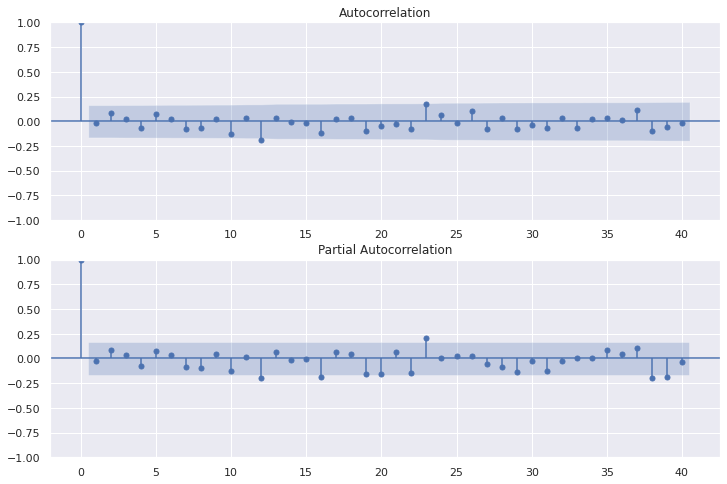

In [18]:
# 残差チェック
residSARIMA = SARIMA_2_1_2_111.resid
fig, axes = plt.subplots(2,1, figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=axes[1])


In [19]:
# 予測
pred = SARIMA_2_1_2_111.predict('1960-01-01', '1961-12-01')
print(pred)

1960-01-01    419.030332
1960-02-01    396.679641
1960-03-01    450.900602
1960-04-01    418.060736
1960-05-01    470.224111
1960-06-01    530.088111
1960-07-01    599.698803
1960-08-01    628.002264
1960-09-01    511.278649
1960-10-01    452.785482
1960-11-01    414.001630
1960-12-01    437.613468
1961-01-01    447.542745
1961-02-01    426.364776
1961-03-01    460.581797
1961-04-01    496.672824
1961-05-01    509.960942
1961-06-01    572.047979
1961-07-01    657.674852
1961-08-01    646.063386
1961-09-01    548.449911
1961-10-01    500.242475
1961-11-01    433.133382
1961-12-01    475.495257
Freq: MS, Name: predicted_mean, dtype: float64


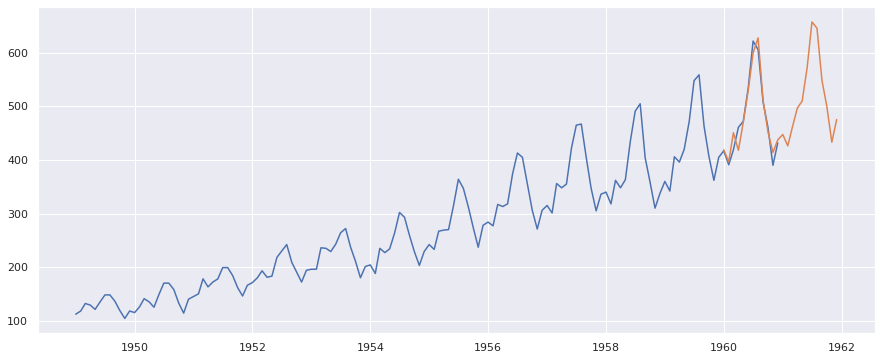

In [20]:
# 実データと予測結果の表示
plt.plot(ts)
plt.plot(pred)